<a href="https://colab.research.google.com/github/zahraafirdausi/Identification-of-Banana-Ripeness-using-CNN/blob/main/P1_Kelompok_7_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banana Ripeness Classification
Di dalam program ini, kita akan menggunakan metode Convolutional Neural Network(CNN) untuk mengklasifikasikan tingkat kematangan buah pisang.

Program dibagi menjadi 3 bagian:
1. Eksplorasi sampel data
2. Membangun CNN
3. Evaluasi akurasi pada data training dan data validasi

## Eksplorasi sampel data

Pertama, siapkan dulu direktori kerjanya dengan memasukkan dataset yang terdiri dari pisang matang dan pisang busuk ke dalam drive.

Berikutnya masukkan path drive letak dataset pada kolom yang disediakan.

**NOTE** Dataset berupa kumpulan gambar pisang didapatkan dari [Fruits fresh and rotten for classification dataset](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Menyiapkan direktori kerja
import os

# Masukkan path dataset di bawah ini
path = "/content/drive/MyDrive/Kuliah/Smt 6/PCD/Projek Tugas Akhir PCD/Dataset"

os.chdir(path)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1bYDXtB_gPJovfkHMaDsZC80R5qQlkicO/Dataset'

In [ ]:
# import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
from google.colab.patches import cv2_imshow

In [ ]:
# Read gambar 

train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

# Directory training fresh banana pictures
train_fresh_dir = os.path.join(train_dir, 'freshbanana')

# Directory training rotten banana pictures
train_rot_dir = os.path.join(train_dir, 'rottenbanana')

# Directory testing fresh banana pictures
test_fresh_dir = os.path.join(test_dir, 'freshbanana')

# Directory testing rotten banana pictures
test_rot_dir = os.path.join(test_dir, 'rottenbanana')

In [ ]:
# Cek nama file

train_fresh_fnames = os.listdir(train_fresh_dir)
print(train_fresh_fnames[:10])

train_rot_fnames = os.listdir(train_rot_dir)
train_rot_fnames.sort()
print(train_rot_fnames[:10])

['rotated_by_45_Screen Shot 2018-06-12 at 9.46.55 PM.png', 'rotated_by_60_Screen Shot 2018-06-12 at 10.02.01 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.47.22 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.51.54 PM.png', 'rotated_by_60_Screen Shot 2018-06-12 at 9.39.17 PM.png', 'rotated_by_60_Screen Shot 2018-06-12 at 9.38.38 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.50.31 PM.png', 'rotated_by_60_Screen Shot 2018-06-12 at 9.39.47 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.49.37 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.47.00 PM.png']
['Screen Shot 2018-06-12 at 8.47.14 PM.png', 'Screen Shot 2018-06-12 at 8.47.28 PM.png', 'Screen Shot 2018-06-12 at 8.47.57 PM.png', 'Screen Shot 2018-06-12 at 8.48.07 PM.png', 'Screen Shot 2018-06-12 at 8.48.18 PM.png', 'Screen Shot 2018-06-12 at 8.48.24 PM.png', 'Screen Shot 2018-06-12 at 8.48.32 PM.png', 'Screen Shot 2018-06-12 at 8.48.46 PM.png', 'Screen Shot 2018-06-12 at 8.49.04 PM.png', 'Screen Shot 2018-06-

In [ ]:
# Menghitung banyak file input

print('total training fresh banana images:', len(os.listdir(train_fresh_dir)))
print('total training rotten banana images:', len(os.listdir(train_rot_dir)))
print('total testing fresh banana images:', len(os.listdir(test_fresh_dir)))
print('total testing rotten banana images:', len(os.listdir(test_rot_dir)))

total training fresh banana images: 1581
total training rotten banana images: 2224
total testing fresh banana images: 381
total testing rotten banana images: 530


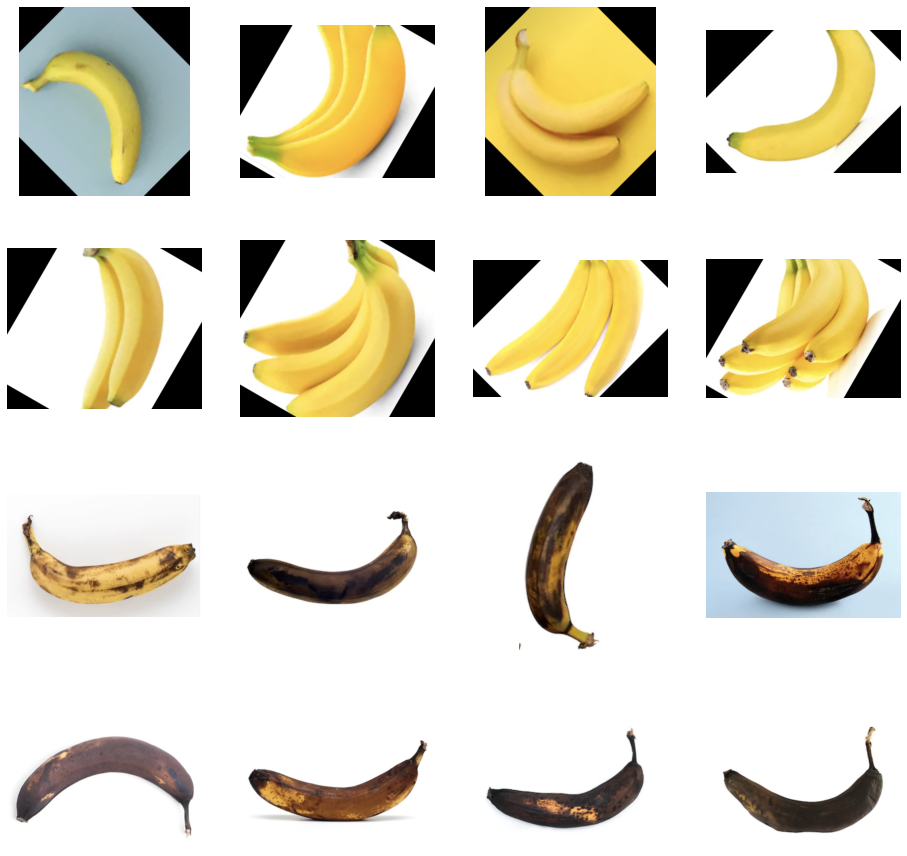

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan sampel pisang matang dan pisang busuk
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_banana_pix = [os.path.join(train_fresh_dir, fname) 
                for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_banana_rot_pix = [os.path.join(train_rot_dir, fname) 
                for fname in train_rot_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_banana_pix+next_banana_rot_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 2. Membangun CNN

Arsitektur CNN yang akan dibangun terdiri dari:
1. layer input
2. 3 layer convolution & pooling
3. fully connected layer

In [ ]:
# DEEP LEARNING ARCHITECTURE

from tensorflow.keras import layers
from tensorflow.keras import Model

# Input berdimensi 150x150px dengan 3 channel untuk Blue, Green, dan Red
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer I: 16 filter berukuran 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer II: 32 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer III: 64 filter berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan layer input dan output
model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# IMAGE DATA GENERATOR

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 3805 images belonging to 2 classes.
Found 911 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=118,  # 3805 images = batch_size * steps = 32*118
      epochs=15,
      validation_data=validation_generator,
      validation_steps=28,  # 911 images = batch_size * steps = 32*28
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
118/118 - 103s - loss: 2.6781e-06 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 0.9989
Epoch 2/15
118/118 - 103s - loss: 4.2333e-08 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 0.9933
Epoch 3/15
118/118 - 103s - loss: 0.0354 - acc: 0.9955 - val_loss: 0.0031 - val_acc: 0.9989
Epoch 4/15
118/118 - 103s - loss: 0.0781 - acc: 0.9963 - val_loss: 0.0288 - val_acc: 0.9955
Epoch 5/15
118/118 - 103s - loss: 1.4385e-04 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 0.9989
Epoch 6/15
118/118 - 102s - loss: 3.1021e-08 - acc: 1.0000 - val_loss: 0.0084 - val_acc: 0.9989
Epoch 7/15
118/118 - 102s - loss: 0.0111 - acc: 0.9984 - val_loss: 0.0110 - val_acc: 0.9978
Epoch 8/15
118/118 - 102s - loss: 4.2084e-07 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 0.9989
Epoch 9/15
118/118 - 102s - loss: 4.2603e-09 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 0.9978
Epoch 10/15
118/118 - 102s - loss: 0.0110 - acc: 0.9984 - val_loss: 0.0275 - val_acc: 0.9967
Epoch 11/15
118/118 - 101s - loss: 0.0045 - acc: 0.9995

Text(0.5, 1.0, 'Training and validation loss')

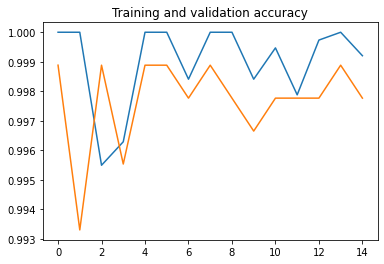

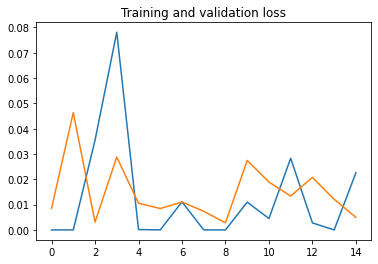

In [ ]:
# VISUALISASI AKURASI PREDIKSI

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

/content/drive/MyDrive/Kuliah/Smt 6/PCD/Projek Tugas Akhir PCD/Dataset/train/rottenbanana/translation_Screen Shot 2018-06-12 at 9.13.21 PM.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


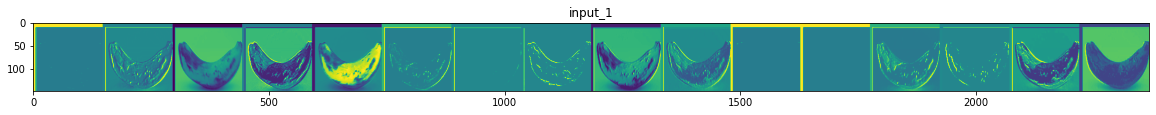

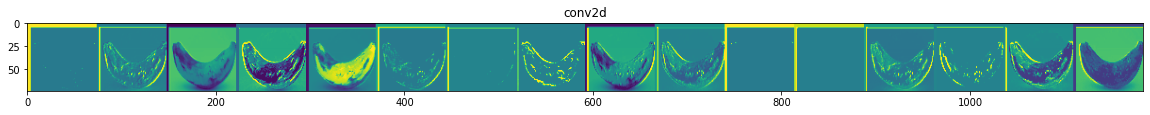

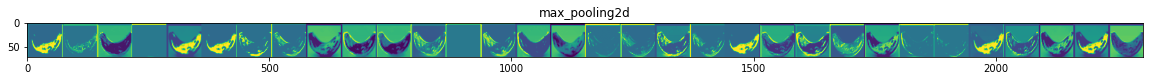

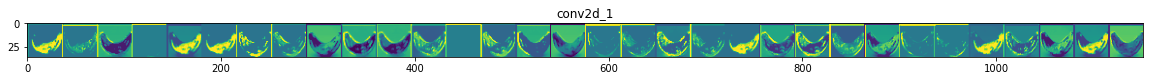

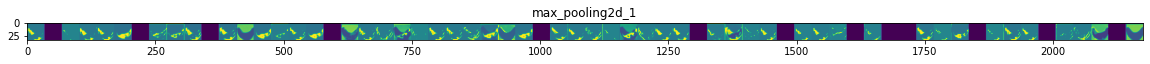

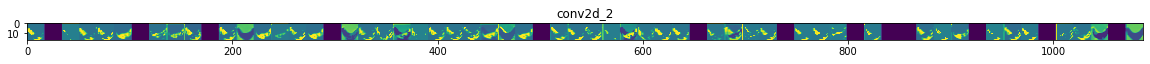

In [ ]:
# DISPLAY FEATURE MAPS

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Mendefinisikan model untuk visualisasi
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Memilih 1 sampel random
fresh_img_files = [os.path.join(train_fresh_dir, f) for f in train_fresh_fnames]
rot_img_files = [os.path.join(train_rot_dir, f) for f in train_rot_fnames]
img_path = random.choice(fresh_img_files + rot_img_files)
print(img_path)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale 1/255
x /= 255

# Memasukkan image ke model
successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# TESTING

from keras.preprocessing import image
import numpy as np

img_path='/content/drive/MyDrive/Kuliah/Smt 6/PCD/Projek Tugas Akhir PCD/Dataset/train/freshbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.49.32 PM.png' # fresh ->[[0.]]
#img_path='/content/drive/MyDrive/Kuliah/Smt 6/PCD/Projek Tugas Akhir PCD/Dataset/train/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.51.38 PM.png' # rotten ->[[1.]]
#img_path='/content/drive/MyDrive/Kuliah/Smt 6/PCD/Projek Tugas Akhir PCD/Dataset/train/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.11.47 PM.png' # salah tebak
img=image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds=model.predict(x)
print(preds)

[[0.]]


## Clean Up

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)